Global parameter definition

In [1]:
using DifferentialEquations

# Global Parameters
AdoptersResponseTime = 2.0
AdvertisingEffectiveness = 0.0001
AdvertisingEndTime = 6.0
AdvertisingStartTime = 0.0
AIPlatformCoordinationTime = 1.0
DataDepletionRate = 0.1
DataNetworkEffectsStrength = 0.7
DataObjectsCoordinationTime = 1.0
DataObjectsDepletionRate = 0.01
DataSharingRate = 0.1
DataTransferRate = 1.0
ExitRate = 0.01
IndividualDataDepletionRate = 0.01
IndividualDataTransformationTime = 1.0
IndividualLearningEfficiency = 0.05
IndividualLearningTime = 1.0
IndividualQualityDepletionRate = 0.01
InterfaceExpansionFlag = 1.0
ContactRate = 0.7
ProcessCoordinationTime = 2.0
ProcessInnovationFlag = 1.0
ReferenceDataforImprovement = 10.0
ReferenceDataperUser = 100.0
ReferenceDataResourceforAIPlatform = 10000.0
TotalPopulation = 1.0e+06
ValueCreationTime = 2.0

TMAX = 24.0

24.0

Model definition

In [2]:
function system_dynamics!(du, u, p, t)

     # zidz function moved inside systemdynamics!

     function zidz(a, b)
        if abs(b) < 1e-6
            return 0.0
        else
            return a / b
        end
    end

    # Variables
    Adopters, AIPlatformCapabilities, AIPlatformData, DataObjects, IndividualCustomerData, 
    IndividualQualityofAIPlatform, MachineBasedInnovation, ProcessInnovation, PotentialAdopters = u

    # Intermediate Calculations
    AIPlatformUseOpportunities = AIPlatformData / Adopters
    AIPlatformValue = (1 + (AIPlatformData / ReferenceDataResourceforAIPlatform)^DataNetworkEffectsStrength)
    DataValuePropositionforCustomer = IndividualQualityofAIPlatform * (1 + (IndividualCustomerData / ReferenceDataperUser)^DataNetworkEffectsStrength)
    ValueCreationOpportunitiesforComplements = max((DataValuePropositionforCustomer - MachineBasedInnovation) / ValueCreationTime, 0)

    # Remaining Definitions
    AdvertisingEffects = if t >= AdvertisingStartTime && t < AdvertisingEndTime
        AdvertisingEffectiveness * PotentialAdopters
    else
        0
    end
    WordofMouthEffects = ContactRate * Adopters * PotentialAdopters / TotalPopulation
    NewAdopters = AdvertisingEffects + WordofMouthEffects
    PlatformExit = ExitRate * Adopters / AdoptersResponseTime
    AIPlatformCapabilitiesChange = max((MachineBasedInnovation * Adopters - AIPlatformCapabilities) / AIPlatformCoordinationTime, 0)
    ScopeofData = AIPlatformCapabilities * ProcessInnovation
    ScaleofData = Adopters * IndividualCustomerData
    DataResourceAccumulation = (ScopeofData + ScaleofData) * DataTransferRate
    DataResourceDepletion = AIPlatformData * DataDepletionRate
    DataObjectsAccumulation = max((AIPlatformValue * DataSharingRate - DataObjects) / DataObjectsCoordinationTime, 0)
    DataObjectsDepletion = DataObjects * DataObjectsDepletionRate
    IndividualDataAccumulation = max(((AIPlatformUseOpportunities - IndividualCustomerData) / IndividualDataTransformationTime + ReferenceDataforImprovement * ValueCreationOpportunitiesforComplements), ReferenceDataforImprovement * ValueCreationOpportunitiesforComplements)
    IndividualDataDepletion = IndividualCustomerData * IndividualDataDepletionRate
    MachineLearning = max((IndividualCustomerData * IndividualLearningEfficiency - IndividualQualityofAIPlatform) / IndividualLearningTime, 0)
    ProcessChange = max(ProcessInnovationFlag * (DataObjects - ProcessInnovation) / ProcessCoordinationTime, 0)
    IndividualQualityDepletion = IndividualQualityofAIPlatform * IndividualQualityDepletionRate

    DataBoundaryRate = zidz(ScopeofData,(ScaleofData+ScopeofData))

    # Differential equations
    du[1] = NewAdopters - PlatformExit
    du[2] = AIPlatformCapabilitiesChange
    du[3] = DataResourceAccumulation - DataResourceDepletion
    du[4] = DataObjectsAccumulation - DataObjectsDepletion
    du[5] = IndividualDataAccumulation - IndividualDataDepletion
    du[6] = MachineLearning - IndividualQualityDepletion
    du[7] = ValueCreationOpportunitiesforComplements
    du[8] = ProcessChange
    du[9] = -NewAdopters
end

system_dynamics! (generic function with 1 method)

Execution

In [3]:
# Initial conditions
u0 = [100.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1e+06]

# Time span for the simulation
tspan = (0.0, TMAX)

# Array for changing the value of DataSharingRate
data_sharing_rates = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

# Array for storing time integration results
solutions = []

# Execution of time integration at each DataSharingRate value
for rate in data_sharing_rates
    DataSharingRate = rate
    prob = ODEProblem(system_dynamics!, u0, tspan)
    push!(solutions, solve(prob))
end


Graph Plots in 1 Window

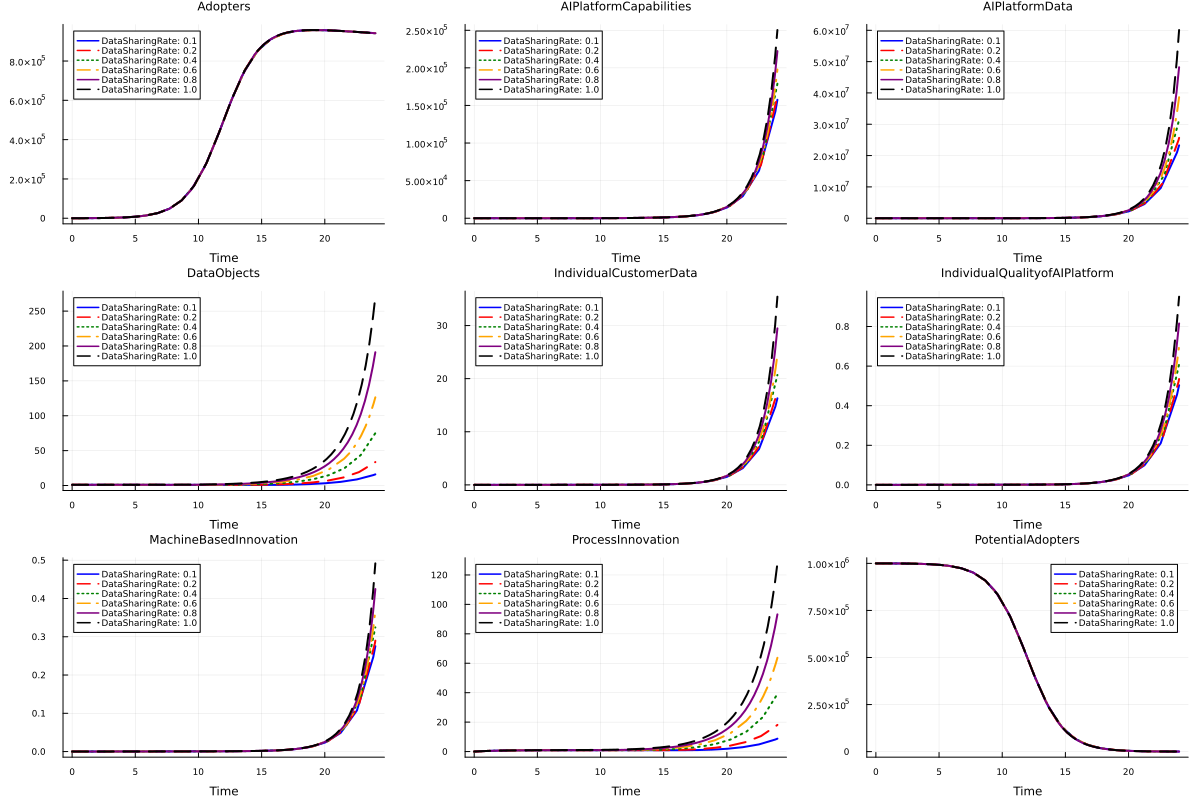

"c:\\Users\\kmako\\Dropbox\\JuliaDocs\\4_AIplatforms\\AIPDataShareRate.pdf"

In [15]:
using Plots

# Graph Setup
title_size = 8
legend_size = 6
tick_size = 6
xlabel_size = 8
ylabel_size = 8

labels = ["Adopters", "AIPlatformCapabilities", "AIPlatformData", "DataObjects", "IndividualCustomerData", "IndividualQualityofAIPlatform", "MachineBasedInnovation", "ProcessInnovation", "PotentialAdopters"]

# Generate a 9-division layout
layout = @layout [a b c; d e f; g h i]
p = plot(layout=layout, size=(1200, 800))

# Define specific colors and line styles for each plot
colors = [:blue, :red, :green, :orange, :purple, :black]
linestyles = [:solid, :dash, :dot, :dashdot]

# Ensure colors follow the specified order
for (index, label) in enumerate(labels)
    for (i, sol) in enumerate(solutions)
        color_index = (i-1) % length(colors)
        plot!(p[index], sol.t, [u[index] for u in sol.u], 
              label="DataSharingRate: $(data_sharing_rates[i])", 
              linewidth=2, legendfontsize=legend_size, tickfontsize=tick_size, 
              xguidefontsize=xlabel_size, yguidefontsize=ylabel_size,
              color=colors[color_index + 1], linestyle=linestyles[(i-1) % length(linestyles) + 1])
    end
    title!(p[index], "$label", titlefontsize=title_size)
    xlabel!(p[index], "Time")
end

display(p)

savefig(p, "AIPDataShareRate.png")
savefig(p, "AIPDataShareRate.pdf")

Graph Plots for DataSharingRate

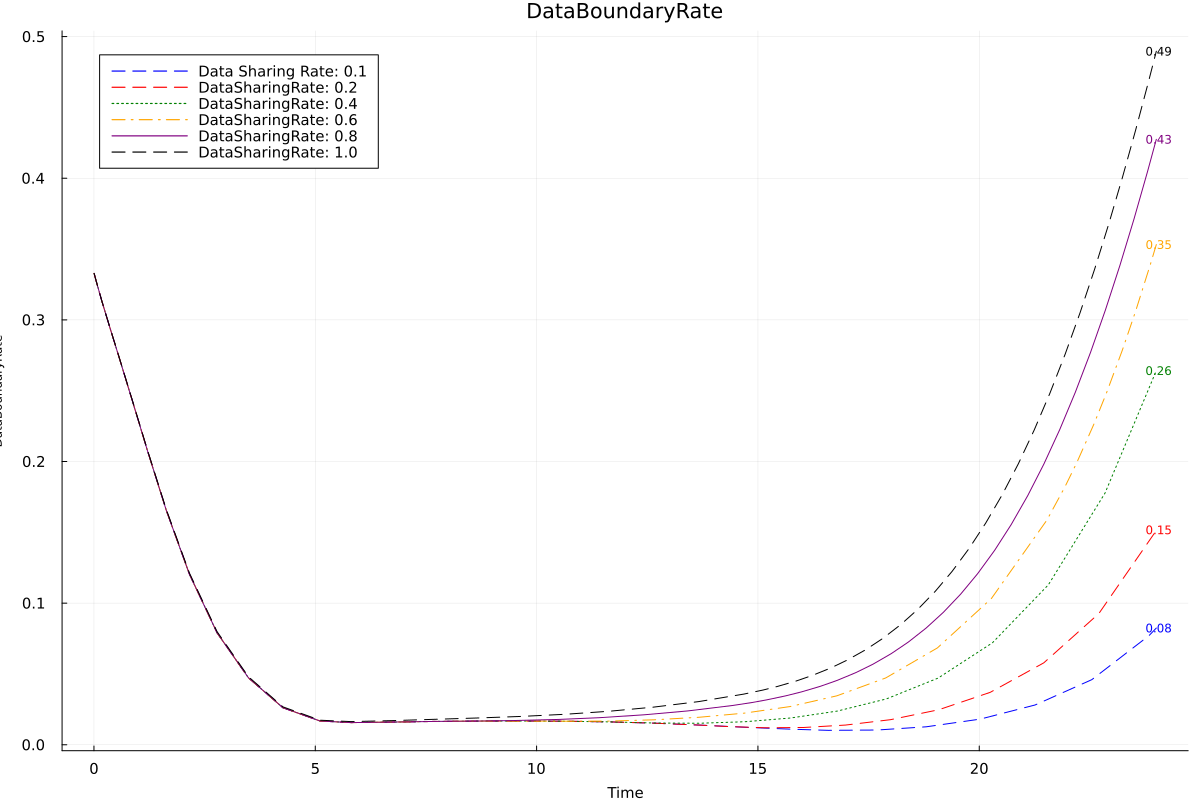

"c:\\Users\\kmako\\Dropbox\\JuliaDocs\\4_AIplatforms\\DataBoundaryRate.pdf"

In [ ]:
using DifferentialEquations, Plots, Random

# Graph Setup
title_size = 14
legend_size = 10
tick_size = 10
xlabel_size = 10
ylabel_size = 8

# Define function to calculate DataBoundaryRate
function compute_databoundaryrate(sol)
    rates = []
    for u in sol.u
        Adopters, AIPlatformCapabilities, _, _, IndividualCustomerData, _, _, ProcessInnovation, _ = u
        ScopeofData = AIPlatformCapabilities * ProcessInnovation
        ScaleofData = Adopters * IndividualCustomerData
        push!(rates, ScopeofData / (ScaleofData + ScopeofData))
    end
    return rates
end

# Calculate DataBoundaryRate for each solution
databoundary_rates = [compute_databoundaryrate(sol) for sol in solutions]

# Define specific colors and line styles for each plot
colors = [:blue, :red, :green, :orange, :purple, :black]
linestyles = [:solid, :dash, :dot, :dashdot]

# Generate initial plot
p = plot(solutions[1].t, databoundary_rates[1], label="Data Sharing Rate: $(data_sharing_rates[1])", 
         color=colors[1], linestyle=linestyles[1 % length(linestyles) ],
         xlabel="Time", ylabel="DataBoundaryRate", title="DataBoundaryRate", 
         titlefontsize=title_size, legendfontsize=legend_size, tickfontsize=tick_size, 
         xtickfontsize=tick_size, ytickfontsize=tick_size, xlabelfontsize=xlabel_size, 
         ylabelfontsize=ylabel_size, legend=:topleft, size=(1200, 800))

# Add the remaining plots with different colors and line styles
for i in 2:length(data_sharing_rates)
    plot!(p, solutions[i].t, databoundary_rates[i], label="DataSharingRate: $(data_sharing_rates[i])", 
          color=colors[(i-1) % length(colors) + 1], linestyle=linestyles[(i-1) % length(linestyles) + 1])
end

# Display the last DataBoundaryRate value for each dataset as an annotation on the graph
annotation_fontsize = 8
for (i, rate) in enumerate(data_sharing_rates)
    last_time = solutions[i].t[end]
    last_rate = databoundary_rates[i][end]
    annotate!(last_time, last_rate, text(" $(round(last_rate, digits=2))", annotation_fontsize, colors[(i-1) % length(colors) + 1]))
end

display(p)

savefig(p, "DataBoundaryRate.png")
savefig(p, "DataBoundaryRate.pdf")